모듈 불러오기

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remoun=True)

Mounted at /gdrive


In [ ]:
!pip install tensorflow==1.15

     |███████████████████████▉        | 307.0MB 1.4MB/s eta 0:01:15ERROR: Exception:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/cli/base_command.py", line 153, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py", line 382, in run
    resolver.resolve(requirement_set)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/legacy_resolve.py", line 201, in resolve
    self._resolve_one(requirement_set, req)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/legacy_resolve.py", line 365, in _resolve_one
    abstract_dist = self._get_abstract_dist_for(req_to_install)
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/legacy_resolve.py", line 313, in _get_abstract_dist_for
    req, self.session, self.finder, self.require_hashes
  File "/usr/local/lib/python3.6/dist-packages/pip/_internal/operations/prepare.py", line 194, in prepare_linked_

In [ ]:
!pip install keras==2.0.0

In [ ]:
import tensorflow as tf
import keras

print(tf.__version__)
print(keras.__version__)

1.15.0
2.0.0


Using TensorFlow backend.


In [5]:
from keras.models import Model
from keras.layers import *
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.utils.vis_utils import model_to_dot
from keras.models import Model, load_model
from keras.utils import plot_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.callbacks import EarlyStopping, TensorBoard
# from sklearn.preprocessing import scale
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import precision_score, recall_score, roc_auc_score, accuracy_score, confusion_matrix
# from skimage.io import imread, imshow, imread_collection, concatenate_images
# from tqdm import tqdm

import keras.backend as K

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
# import pandas as pd
import os
import sys
# #################################
# from PIL import Image
# import PIL
# import tensorflow as tf
# import random

데이터 경로 지정

In [6]:
BASE_PATH = r'/gdrive/My Drive/DeepLearning/DRIVE/training'
IMG_DATA_PATH = os.path.join(BASE_PATH, 'images')
MASK_DATA_PATH = os.path.join(BASE_PATH, '1st_manual')

In [9]:
print(IMG_DATA_PATH)  ###경로 확인
print(MASK_DATA_PATH)

/gdrive/My Drive/DeepLearning/DRIVE/training/images
/gdrive/My Drive/DeepLearning/DRIVE/training/1st_manual


In [ ]:
#hyper-parameter 설정 
IMG_HEIGHT, IMG_WIDTH = (96, 96) # 이미지 사이즈
EPOCHS = 10                      # 훈련 횟수
BATCH_SIZE = 5                   # 한번에 입력할 데이터 개수 
INIT_FILTERS = 32                # 모델 채널 크기
LEARNING_RATE = 2e-4             # 학습률
DECAY_RATE = 0.9                 # 학습률 감소 비율 
ACTIVATION_FN = 'elu'            # 활성함수 ex: relu, elu, sigmoid
DROP_RATE = 0.25                 # 드롭아웃 비율
VAL_RATIO = 0.2                  # 검증 데이터 비율
IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3

In [ ]:
###data 경로 불러오기
img_path = sorted(glob.glob(os.path.join(IMG_DATA_PATH, '*.tif')))
mask_path = sorted(glob.glob(os.path.join(MASK_DATA_PATH, '*.gif')))

In [ ]:
img_path

['/gdrive/My Drive/DeepLearning/DRIVE/training/images/21_training.tif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/images/22_training.tif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/images/23_training.tif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/images/24_training.tif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/images/25_training.tif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/images/26_training.tif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/images/27_training.tif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/images/28_training.tif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/images/29_training.tif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/images/30_training.tif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/images/31_training.tif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/images/32_training.tif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/images/33_training.tif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/images/34_trainin

In [ ]:
mask_path

['/gdrive/My Drive/DeepLearning/DRIVE/training/1st_manual/21_manual1.gif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/1st_manual/22_manual1.gif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/1st_manual/23_manual1.gif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/1st_manual/24_manual1.gif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/1st_manual/25_manual1.gif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/1st_manual/26_manual1.gif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/1st_manual/27_manual1.gif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/1st_manual/28_manual1.gif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/1st_manual/29_manual1.gif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/1st_manual/30_manual1.gif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/1st_manual/31_manual1.gif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/1st_manual/32_manual1.gif',
 '/gdrive/My Drive/DeepLearning/DRIVE/training/1st_manual/33_manual1.gif',
 '/gdrive/My Drive/DeepLe

In [ ]:
#data 불러오
def load_and_resize_png1(path, img_height, img_width):
    img = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    img = cv2.resize(img, dsize=(img_height, img_width), interpolation=cv2.INTER_AREA)
    return img

def load_and_resize_png2(path, img_height, img_width):
    #img = cv2.imread(path, cv2.IMREAD_UNCHANGED).astype(np.float32) / 255.
    img = PIL.Image.open(path).convert("L")
    img = np.array(img).astype(np.float32) / 255.
    img = cv2.resize(img, dsize=(img_height, img_width), interpolation=cv2.INTER_NEAREST)
    return img

def load_and_resize_nii(path, img_height, img_width):
    img = nb.load(path).get_data()
    img = np.transpose(np.squeeze(img), (1, 0))
    img = cv2.resize(img, dsize=(img_height, img_width), interpolation=cv2.INTER_AREA).astype(np.uint8)
    return img

In [ ]:
imgs = np.stack([load_and_resize_png1(i_path, IMG_HEIGHT, IMG_WIDTH) for i_path in img_path])
print(imgs.shape)
#print(IMG_HEIGHT, IMG_WIDTH, m_path)
masks = np.stack([load_and_resize_png2(m_path, IMG_HEIGHT, IMG_WIDTH) for m_path in mask_path])
print(masks.shape)

(20, 256, 256, 3)
(20, 256, 256)


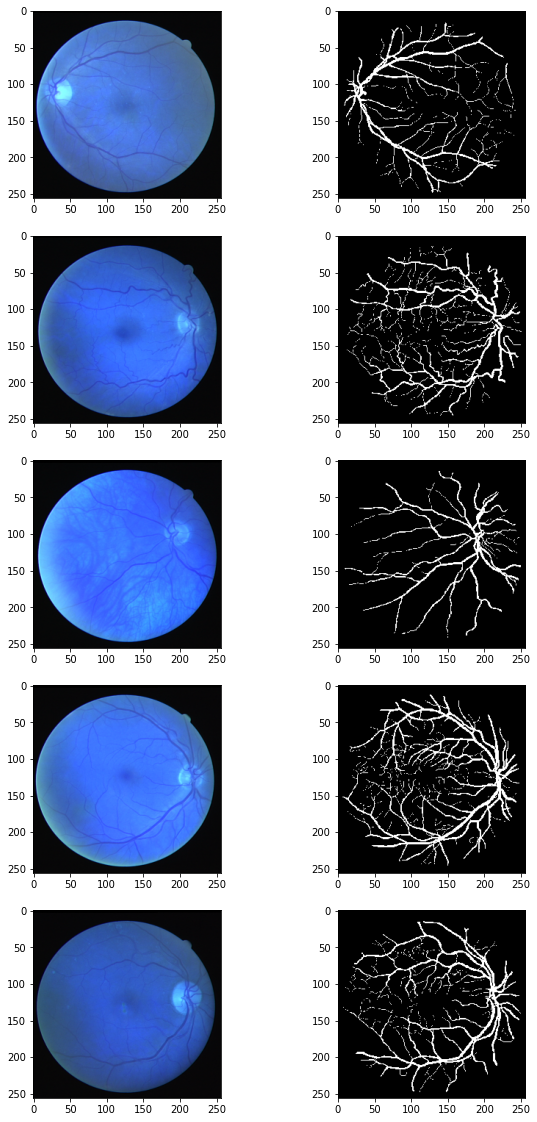

In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(10, 20))
for i in range(5):
    ax[i,0].imshow(imgs[i], cmap='gray')
    ax[i,1].imshow(masks[i], cmap='gray')
plt.show()

In [ ]:
print('형태: ', np.shape(imgs))

형태:  (20, 256, 256, 3)


In [ ]:
masks = np.expand_dims(masks, axis=3)
print('형태: ', np.shape(masks))

형태:  (20, 256, 256, 1)


In [ ]:
imgs_train, imgs_val, masks_train, masks_val = train_test_split(imgs, masks, test_size=VAL_RATIO)
print('훈련 데이터 개수: ', len(imgs_train))
print('검증 데이터 개수: ', len(imgs_val))

훈련 데이터 개수:  16
검증 데이터 개수:  4


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import random
seed = 42
#random.seed = seed
#np.random.seed = 42
batch_size = 32

def data_augment(x, y, X_validation, Y_validation):
    print(x.shape)
    print(y.shape)
    data_gen_args = dict(rotation_range=30,
                        width_shift_range=0.3,
                        height_shift_range=0.3,
                        zoom_range=0.3,                   
                        vertical_flip=True,
                        horizontal_flip=True,
                        fill_mode='nearest')
                        

    X_datagen = ImageDataGenerator(**data_gen_args)
    Y_datagen = ImageDataGenerator(**data_gen_args)

    X_train_augmented = X_datagen.flow(x, batch_size=batch_size, shuffle=True,seed=seed)
    Y_train_augmented = Y_datagen.flow(y, batch_size=batch_size, shuffle=True,seed=seed)


    X_datagen_val = ImageDataGenerator()
    Y_datagen_val = ImageDataGenerator()
    X_datagen_val.fit(X_validation, augment=True, seed=seed)
    Y_datagen_val.fit(Y_validation, augment=True, seed=seed)
    X_validation_augmented = X_datagen_val.flow(X_validation, batch_size=batch_size, shuffle=True, seed=seed)
    Y_validation_augmented = Y_datagen_val.flow(Y_validation, batch_size=batch_size, shuffle=True, seed=seed)


    train_generator = zip(X_train_augmented, Y_train_augmented)
    validation_generator = zip(X_validation_augmented, Y_validation_augmented)
    
    return train_generator, validation_generator

In [ ]:
train_generator, validation_generator = data_augment(imgs, masks, imgs, masks)

(20, 256, 256, 3)
(20, 256, 256, 1)


In [ ]:
train_generator

In [ ]:
def mean_iou(y_true, y_pred):
    prec = []
    for t in np.arange(0.5, 1.0, 0.05):     
        y_pred_ = tf.to_int32(y_pred > t)
        # y_pred_ = tf.compat.v1.to_int32(y_pred > t)
        score, up_opt = tf.metrics.mean_iou(y_true, y_pred_, 2)
        # score, up_opt = tf.compat.v1.metrics.mean_iou(y_true, y_pred_, 2)
        K.get_session().run(tf.local_variables_initializer())
        # tf.compat.v1.keras.backend.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([up_opt]):
            score = tf.identity(score)
        prec.append(score)
    return K.mean(K.stack(prec), axis=0)

In [ ]:
inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = Lambda(lambda x: x / 255) (inputs)

c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
c1 = Dropout(0.1) (c1)
c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
p1 = MaxPooling2D((2, 2)) (c1)

c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
c2 = Dropout(0.1) (c2)
c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
p2 = MaxPooling2D((2, 2)) (c2)

c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
c3 = Dropout(0.2) (c3)
c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
p3 = MaxPooling2D((2, 2)) (c3)

c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
c4 = Dropout(0.2) (c4)
c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
p4 = MaxPooling2D(pool_size=(2, 2)) (c4)

c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
c5 = Dropout(0.3) (c5)
c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
u6 = concatenate([u6, c4])
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
c6 = Dropout(0.2) (c6)
c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = concatenate([u7, c3])
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
c7 = Dropout(0.2) (c7)
c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = concatenate([u8, c2])
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
c8 = Dropout(0.1) (c8)
c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = concatenate([u9, c1], axis=3)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
c9 = Dropout(0.1) (c9)
c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

outputs = Conv2D(1, (1, 1), activation='sigmoid') (c9)

model = Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[mean_iou])
model.summary()




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
dropout_1 (Dropout)          (None, 256, 256, 16)      0         
_________________________________________________________

In [ ]:
earlystopper = EarlyStopping(patience=15, verbose=1)
checkpointer = ModelCheckpoint('/gdrive/My Drive/DeepLearning/DRIVE/DRIVE-UNET.h5', verbose=1, save_best_only=True)
results = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 20, validation_steps = 10,  epochs=1000, 
                    callbacks=[earlystopper, checkpointer])

Epoch 1/1000
20/20 [==============================] - 8s - loss: 0.1388 - mean_iou: 0.4925 - val_loss: 0.1524 - val_mean_iou: 0.4935
Epoch 2/1000
20/20 [==============================] - 7s - loss: 0.1875 - mean_iou: 0.4940 - val_loss: 0.1552 - val_mean_iou: 0.4945
Epoch 3/1000
20/20 [==============================] - 7s - loss: 0.1748 - mean_iou: 0.4950 - val_loss: 0.1551 - val_mean_iou: 0.4956
Epoch 4/1000
20/20 [==============================] - 7s - loss: 0.1786 - mean_iou: 0.4959 - val_loss: 0.1573 - val_mean_iou: 0.4964
Epoch 5/1000
20/20 [==============================] - 7s - loss: 0.1842 - mean_iou: 0.4967 - val_loss: 0.1564 - val_mean_iou: 0.4970
Epoch 6/1000
20/20 [==============================] - 7s - loss: 0.1772 - mean_iou: 0.4973 - val_loss: 0.1546 - val_mean_iou: 0.4977
Epoch 7/1000
20/20 [==============================] - 7s - loss: 0.1809 - mean_iou: 0.4980 - val_loss: 0.1727 - val_mean_iou: 0.4983
Epoch 8/1000
20/20 [==============================] - 8s - loss: 0.16

In [ ]:
# model = load_model('/gdrive/My Drive/DRIVE/DRIVE-UNET.h5', custom_objects={'mean_iou': mean_iou})

In [ ]:
preds_train = model.predict(imgs[:int(imgs.shape[0]*0.9)], verbose=1)
preds_val = model.predict(imgs[int(imgs.shape[0]*0.9):], verbose=1)

2/2 [==============================] - 0s


In [ ]:
preds_train_t = (preds_train > 0.2).astype(np.uint8)
preds_val_t = (preds_val > 0.2).astype(np.uint8)

In [ ]:
preds_train_t.shape

(18, 256, 256, 1)

In [ ]:
preds_train_t[0,:,:,0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

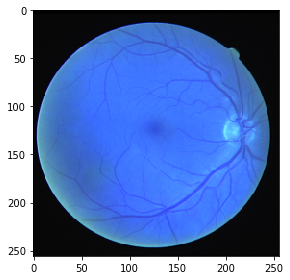

TypeError: ignored

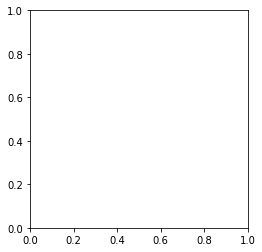

In [ ]:
ix = random.randint(0, len(preds_train_t))
imshow(imgs[ix])
plt.show()
imshow(np.squeeze(masks[ix]))
plt.show()
imshow(np.squeeze(preds_train_t[ix]))
plt.show()
#imshow(np.squeeze(preds_val_t[ix]))
#plt.show()

In [ ]:
mean_iou = results.history['mean_iou']
val_mean_iou = results.history['val_mean_iou']
loss = results.history['loss']
val_loss = results.history['val_loss']

In [ ]:
epochs = range(len(mean_iou))

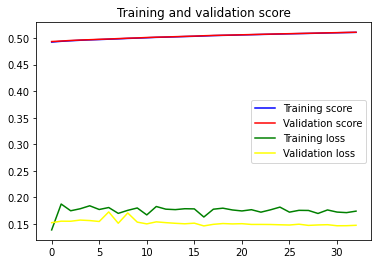

In [ ]:
plt.plot(epochs, mean_iou, 'b', color='blue', label='Training score')
plt.plot(epochs, val_mean_iou, 'b', color='red', label='Validation score')
plt.plot(epochs, loss, 'b', color='green', label='Training loss')
plt.plot(epochs, val_loss, 'b', color='yellow', label='Validation loss')
plt.title('Training and validation score')
plt.legend()
plt.show()

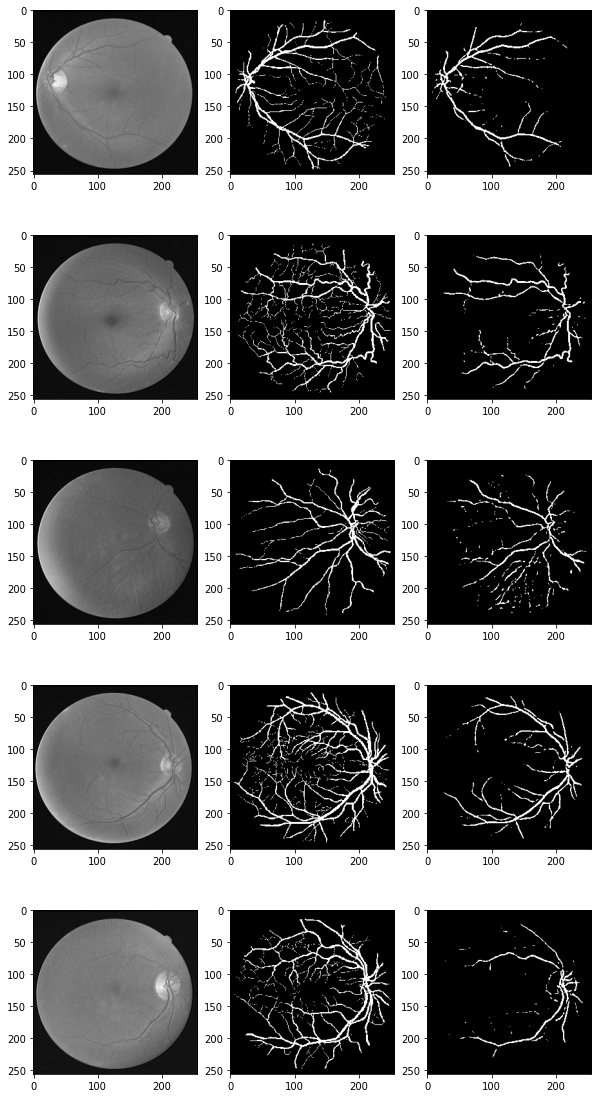

In [ ]:
fix, ax = plt.subplots(5, 3, figsize=(10,20))
for i in range(5):
    pred = model.predict(imgs[i][np.newaxis, :, : ,:])
    mask = (pred >= 0.5).astype(np.uint8)
    ax[i, 0].imshow(imgs[i, :, :, 0], cmap='gray')
    ax[i, 1].imshow(masks[i, :, :, 0], cmap='gray')
    ax[i, 2].imshow(mask[0, :, :, 0], cmap='gray')
plt.show()

In [ ]:
y_pred = model.predict(imgs)
y_pred_threshold = []
for y in y_pred:
    _, temp = cv2.threshold(y, 0.5, 1, cv2.THRESH_BINARY)
    y_pred_threshold.append(temp)
masks = list(np.ravel(masks))
y_pred_threshold = list(np.ravel(y_pred_threshold))

tn, fp, fn, tp = confusion_matrix(masks, y_pred_threshold).ravel()

print('Accuracy:', accuracy_score(masks, y_pred_threshold))

print('Sensitivity:', recall_score(masks, y_pred_threshold))

print('Specificity', tn / (tn + fp))

print('NPV', tn / (tn + fn))

print('PPV', tp / (tp + fp))
print('AUC:', roc_auc_score(masks, list(np.ravel(y_pred))))

print('Precision:', precision_score(masks, y_pred_threshold))

Accuracy: 0.9449020385742187
Sensitivity: 0.5056309992480206
Specificity 0.9863595185712437
NPV 0.954833745410106
PPV 0.7777006708304418
AUC: 0.9486110451672082
Precision: 0.7777006708304418
